# Analysis of the BANK Marketing


The goal of this project is to better understand which factors are most important in driving bank marketing, and how those factors relate to loans.


In [6]:
%pylab inline
%config InlineBackend.figure_formats = ['retina']

#######################
#       imports       #
#######################
import pandas as pd
import numpy as np
import seaborn as sns
# import sklearn
sns.set_style("whitegrid", {"font.family": ["serif"]})
sns.set_context("talk") # talk context is good for RISE
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV
%matplotlib inline

Populating the interactive namespace from numpy and matplotlib


In [7]:
# load anscombe data
bankset = pd.read_csv('./bank-additional-full.csv')
bankset.head(3)




,"age;""job"";""marital"";""education"";""default"";""housing"";""loan"";""contact"";""month"";""day_of_week"";""duration"";""campaign"";""pdays"";""previous"";""poutcome"";""emp.var.rate"";""cons.price.idx"";""cons.conf.idx"";""euribor3m"";""nr.employed"";""y"""
0,"56;""housemaid"";""married"";""basic.4y"";""no"";""no"";..."
1,"57;""services"";""married"";""high.school"";""unknown..."
2,"37;""services"";""married"";""high.school"";""no"";""ye..."


In [39]:
bankset.describe()


,age,duration,campaign,poutcome,cons_price_idx,cons_conf_idx,euribor3m
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,2.567593,962.475454,0.081886,-40.502600,3.621291,5167.035911
std,10.42125,2.770014,186.910907,1.570960,4.628198,1.734447,72.251528
min,17.00000,1.000000,0.000000,-3.400000,-50.800000,0.634000,4963.600000
25%,32.00000,1.000000,999.000000,-1.800000,-42.700000,1.344000,5099.100000
50%,38.00000,2.000000,999.000000,1.100000,-41.800000,4.857000,5191.000000
75%,47.00000,3.000000,999.000000,1.400000,-36.400000,4.961000,5228.100000
max,98.00000,56.000000,999.000000,1.400000,-26.900000,5.045000,5228.100000


In [8]:
# split column into multiple columns by delimiter 
bankset=bankset['age;"job";"marital";"education";"default";"housing";"loan";"contact";"month";"day_of_week";"duration";"campaign";"pdays";"previous";"poutcome";"emp.var.rate";"cons.price.idx";"cons.conf.idx";"euribor3m";"nr.employed";"y"'].str.split(';', expand=True)


In [9]:
bankset.head(6)

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,56,"""housemaid""","""married""","""basic.4y""","""no""","""no""","""no""","""telephone""","""may""","""mon""",...,1,999,0,"""nonexistent""",1.1,93.994,-36.4,4.857,5191,"""no"""
1,57,"""services""","""married""","""high.school""","""unknown""","""no""","""no""","""telephone""","""may""","""mon""",...,1,999,0,"""nonexistent""",1.1,93.994,-36.4,4.857,5191,"""no"""
2,37,"""services""","""married""","""high.school""","""no""","""yes""","""no""","""telephone""","""may""","""mon""",...,1,999,0,"""nonexistent""",1.1,93.994,-36.4,4.857,5191,"""no"""
3,40,"""admin.""","""married""","""basic.6y""","""no""","""no""","""no""","""telephone""","""may""","""mon""",...,1,999,0,"""nonexistent""",1.1,93.994,-36.4,4.857,5191,"""no"""
4,56,"""services""","""married""","""high.school""","""no""","""no""","""yes""","""telephone""","""may""","""mon""",...,1,999,0,"""nonexistent""",1.1,93.994,-36.4,4.857,5191,"""no"""
5,45,"""services""","""married""","""basic.9y""","""unknown""","""no""","""no""","""telephone""","""may""","""mon""",...,1,999,0,"""nonexistent""",1.1,93.994,-36.4,4.857,5191,"""no"""


In [10]:
bankset.columns

RangeIndex(start=0, stop=21, step=1)

In [11]:
bankset.info

<bound method DataFrame.info of        0              1          2                      3          4      5   \
0      56    "housemaid"  "married"             "basic.4y"       "no"   "no"   
1      57     "services"  "married"          "high.school"  "unknown"   "no"   
2      37     "services"  "married"          "high.school"       "no"  "yes"   
3      40       "admin."  "married"             "basic.6y"       "no"   "no"   
4      56     "services"  "married"          "high.school"       "no"   "no"   
...    ..            ...        ...                    ...        ...    ...   
41183  73      "retired"  "married"  "professional.course"       "no"  "yes"   
41184  46  "blue-collar"  "married"  "professional.course"       "no"   "no"   
41185  56      "retired"  "married"    "university.degree"       "no"  "yes"   
41186  44   "technician"  "married"  "professional.course"       "no"   "no"   
41187  74      "retired"  "married"  "professional.course"       "no"  "yes"   

       

In [12]:
bankset.columns

RangeIndex(start=0, stop=21, step=1)

In [13]:
bankset.head()


,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,56,"""housemaid""","""married""","""basic.4y""","""no""","""no""","""no""","""telephone""","""may""","""mon""",...,1,999,0,"""nonexistent""",1.1,93.994,-36.4,4.857,5191,"""no"""
1,57,"""services""","""married""","""high.school""","""unknown""","""no""","""no""","""telephone""","""may""","""mon""",...,1,999,0,"""nonexistent""",1.1,93.994,-36.4,4.857,5191,"""no"""
2,37,"""services""","""married""","""high.school""","""no""","""yes""","""no""","""telephone""","""may""","""mon""",...,1,999,0,"""nonexistent""",1.1,93.994,-36.4,4.857,5191,"""no"""
3,40,"""admin.""","""married""","""basic.6y""","""no""","""no""","""no""","""telephone""","""may""","""mon""",...,1,999,0,"""nonexistent""",1.1,93.994,-36.4,4.857,5191,"""no"""
4,56,"""services""","""married""","""high.school""","""no""","""no""","""yes""","""telephone""","""may""","""mon""",...,1,999,0,"""nonexistent""",1.1,93.994,-36.4,4.857,5191,"""no"""


In [14]:
bankset.shape


(41188, 21)

In [15]:
# fix the columns names

bankset.columns =['age', 'job', 'Age', 'marital','education','default','housing','loan','contact','month','day_of_week','duration','campaign','pdays','previous','poutcome','emp_var_rate','cons_price_idx','cons_conf_idx','euribor3m','nr_employed']


In [16]:
bankset.head()


,age,job,Age,marital,education,default,housing,loan,contact,month,...,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
0,56,"""housemaid""","""married""","""basic.4y""","""no""","""no""","""no""","""telephone""","""may""","""mon""",...,1,999,0,"""nonexistent""",1.1,93.994,-36.4,4.857,5191,"""no"""
1,57,"""services""","""married""","""high.school""","""unknown""","""no""","""no""","""telephone""","""may""","""mon""",...,1,999,0,"""nonexistent""",1.1,93.994,-36.4,4.857,5191,"""no"""
2,37,"""services""","""married""","""high.school""","""no""","""yes""","""no""","""telephone""","""may""","""mon""",...,1,999,0,"""nonexistent""",1.1,93.994,-36.4,4.857,5191,"""no"""
3,40,"""admin.""","""married""","""basic.6y""","""no""","""no""","""no""","""telephone""","""may""","""mon""",...,1,999,0,"""nonexistent""",1.1,93.994,-36.4,4.857,5191,"""no"""
4,56,"""services""","""married""","""high.school""","""no""","""no""","""yes""","""telephone""","""may""","""mon""",...,1,999,0,"""nonexistent""",1.1,93.994,-36.4,4.857,5191,"""no"""


In [17]:
bankset.shape


(41188, 21)

# Check nulls

In [40]:
bankset.isnull().sum()


age               0
job               0
Age               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp_var_rate      0
cons_price_idx    0
cons_conf_idx     0
euribor3m         0
nr_employed       0
dtype: int64

#### Strip columns names

In [41]:
bankset.columns


Index(['age', 'job', 'Age', 'marital', 'education', 'default', 'housing',
       'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx',
       'cons_conf_idx', 'euribor3m', 'nr_employed'],
      dtype='object')

In [18]:
print(bankset.dtypes)


age               object
job               object
Age               object
marital           object
education         object
default           object
housing           object
loan              object
contact           object
month             object
day_of_week       object
duration          object
campaign          object
pdays             object
previous          object
poutcome          object
emp_var_rate      object
cons_price_idx    object
cons_conf_idx     object
euribor3m         object
nr_employed       object
dtype: object


In [19]:
bankset["age"] = bankset["age"].astype(str).astype(int)
bankset["duration"] = bankset["duration"].astype(str).astype(int)
bankset["cons_price_idx"] = bankset["cons_price_idx"].astype(str).astype(float)
bankset["campaign"] = bankset["campaign"].astype(str).astype(float)
bankset["poutcome"] = bankset["poutcome"].astype(str).astype(float)
bankset["cons_conf_idx"] = bankset["cons_conf_idx"].astype(str).astype(float)
bankset["euribor3m"] = bankset["euribor3m"].astype(str).astype(float)



In [20]:
print(bankset.dtypes)


age                 int64
job                object
Age                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign          float64
pdays              object
previous           object
poutcome          float64
emp_var_rate       object
cons_price_idx    float64
cons_conf_idx     float64
euribor3m         float64
nr_employed        object
dtype: object


here i use Linear Regression to see the how the marital state effect on age and duration to complate their the loan  

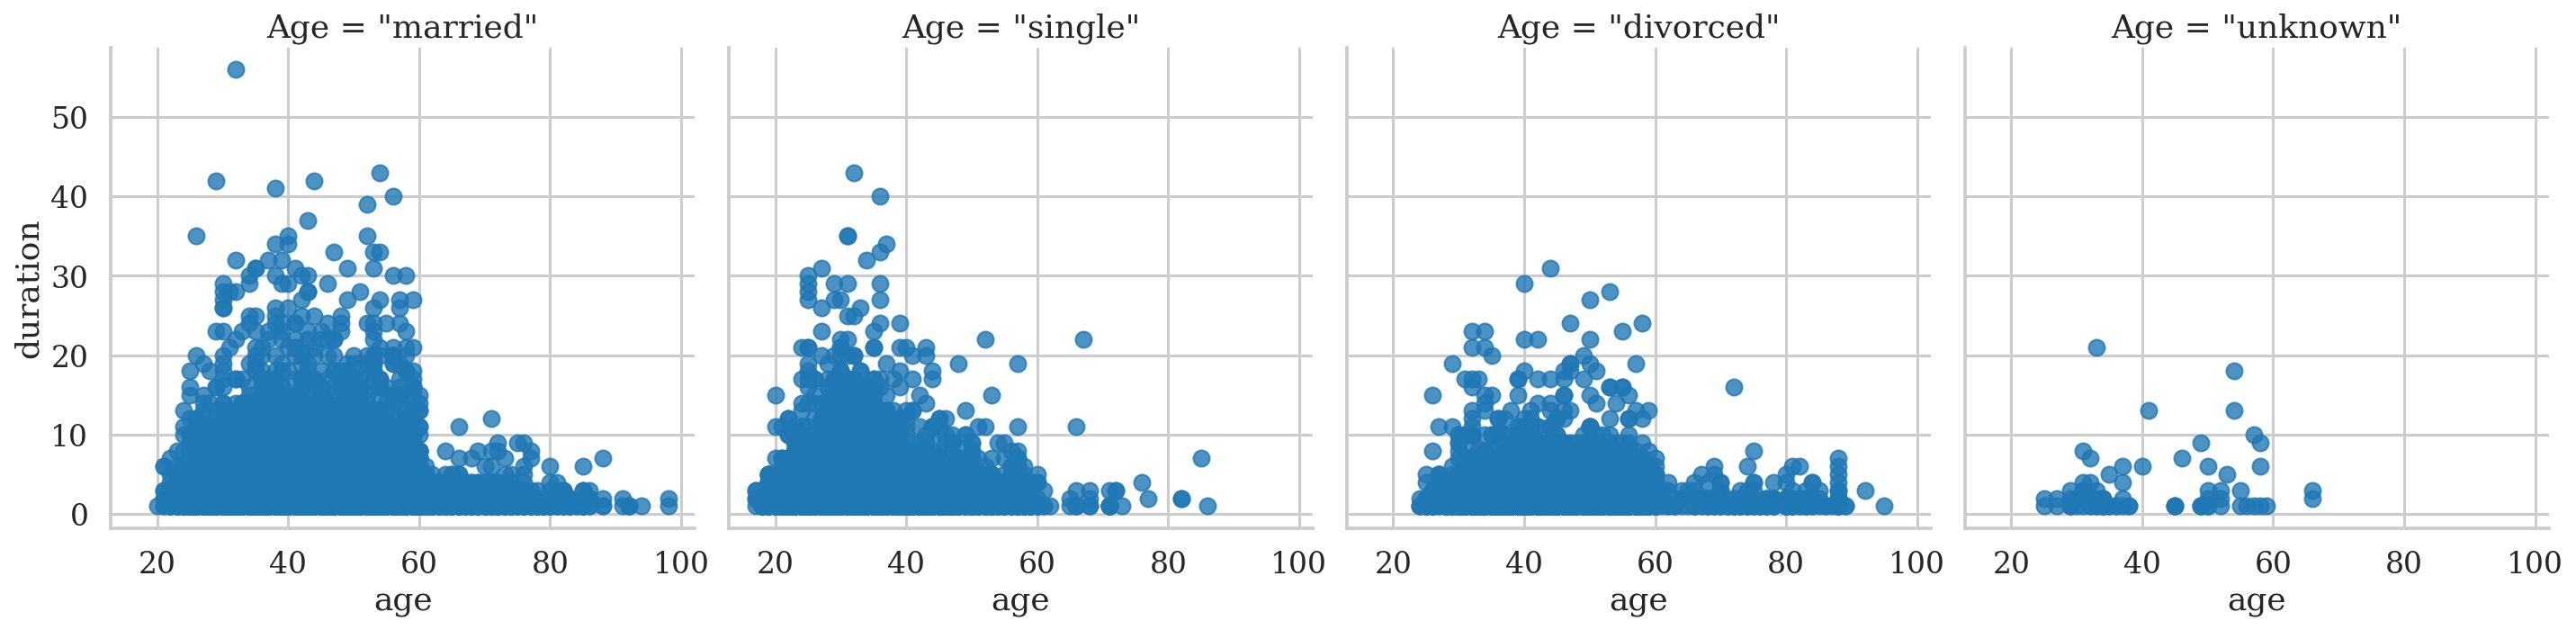

In [21]:
# plot with matplotlib
sns.lmplot(x="age", y="duration", col="Age", fit_reg=False,
           ci=None, data=bankset, height=5)


/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


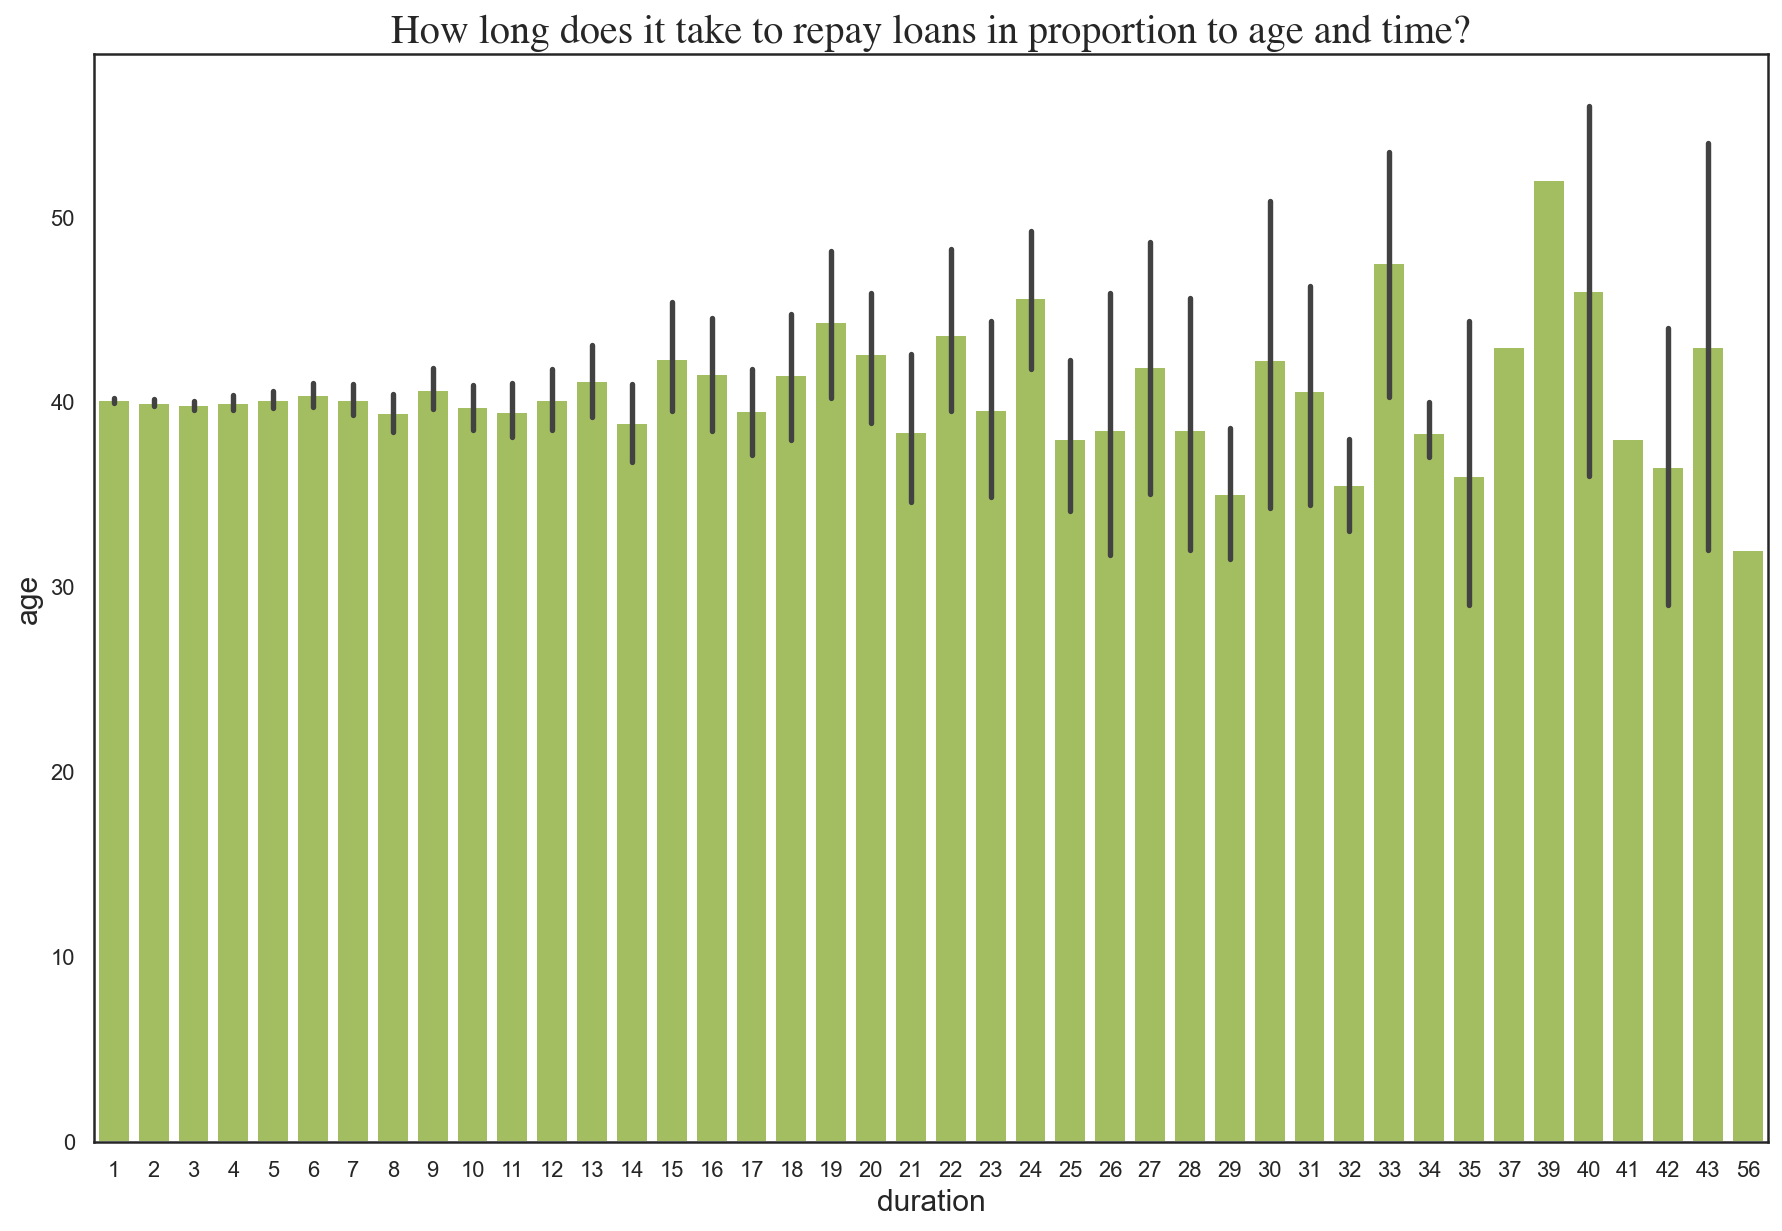

In [37]:
y = bankset.age
x = bankset.duration

plt.figure(figsize=(15,10))
sns.set_theme(context='notebook', style='white')

plt.xlabel('Stations',size = 15)
plt.ylabel('Number of Exits', size = 15)

plt.title("How long does it take to repay loans in proportion to age and time?", size=20, family='Times')

sns.barplot(x,y,color='#aacE50');
